import X(二维坐标点),eps,MinPts
output IDX,isnoise(noiseFlag)

In [1]:
%cd c://Users//28763//Desktop//GraduationProjectCode

c:\Users\28763\Desktop\GraduationProjectCode


In [2]:
import numpy as np
import sys
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import matplotlib as mpl

# sys.path.append("..")

from utils.DataLoader import *

In [3]:
loader = DataLoader("room1", 3)
data, frames = loader.load()

In [4]:
weighted = np.array([1, 1, 0.5])
tempData = data[data["timestamp"].eq("2019-07-15 21:22:36.322000")]

In [ ]:
X = weighted * tempData.iloc[:, 2:5].values
dbscan = DBSCAN(eps=0.1, min_samples=5, metric="l2")
labels = dbscan.fit_predict(X)
unique_label = np.unique(labels)
labels, unique_label

(array([ 0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  0,  0,  0,  0,  1,  1,  0,  0,  0, -1, -1, -1, -1, -1,  1, -1,
         1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1, -1], dtype=int64),
 array([-1,  0,  1], dtype=int64))

In [15]:
mask = labels == 1
x, y, z = X[mask, 0].reshape(-1, 1), X[mask, 1].reshape(-1, 1), X[mask, 2].reshape(-1, 1)

NameError: name 'x_min' is not defined

<Figure size 4000x4000 with 0 Axes>

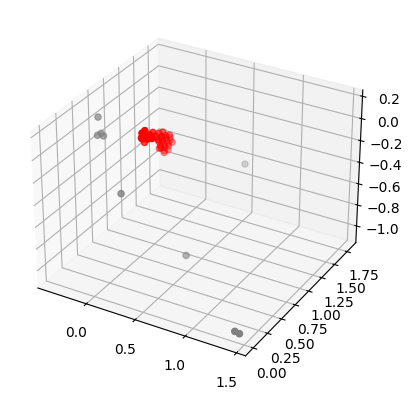

In [ ]:
fig = plt.figure(figsize=(20, 20), dpi=200)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
colormap = ["red", "blue", "yellow", "gray", "green", "purple"]

for label in unique_label:
    mask = labels == label
    if label == -1:
        ax.scatter(X[mask, 0], X[mask, 1], X[mask, 2], c="gray", label="noise")
    else:
        ax.scatter(
            X[mask, 0],
            X[mask, 1],
            X[mask, 2],
            c=colormap[label],
            label=f"cluster{label}",
        )
        ax.plot3D([x_min, x_max], [y_min, y_min], [z_min, z_min], "r--")
        ax.plot3D([x_min, x_max], [y_max, y_max], [z_min, z_min], "r--")
        ax.plot3D([x_min, x_max], [y_min, y_min], [z_max, z_max], "r--")
        ax.plot3D([x_min, x_max], [y_max, y_max], [z_max, z_max], "r--")
        ax.plot3D([x_min, x_min], [y_min, y_max], [z_min, z_min], "r--")
        ax.plot3D([x_max, x_max], [y_min, y_max], [z_min, z_min], "r--")
        ax.plot3D([x_min, x_min], [y_min, y_max], [z_max, z_max], "r--")
        ax.plot3D([x_max, x_max], [y_min, y_max], [z_max, z_max], "r--")
        ax.plot3D([x_min, x_min], [y_min, y_min], [z_min, z_max], "r--")
        ax.plot3D([x_max, x_max], [y_min, y_min], [z_min, z_max], "r--")
        ax.plot3D([x_min, x_min], [y_max, y_max], [z_min, z_max], "r--")
        ax.plot3D([x_max, x_max], [y_max, y_max], [z_min, z_max], "r--")